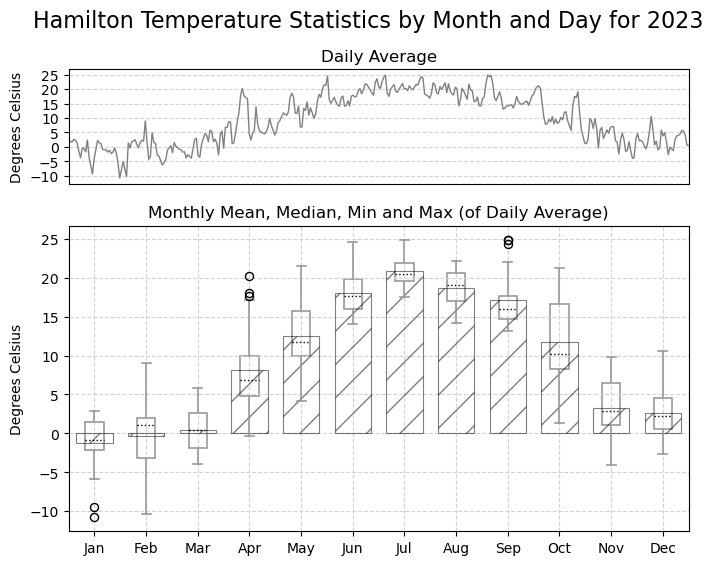

In [2]:
'''
a4_Robbins_000371194.py
I, Jacob Robbins, student number 000371194, certify that this material is my original work.
No other person's work has been used without due acknowledgment and I have not made my work
available to anyone else.
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Read CSV file
df = pd.read_csv("a4_hamilton_climate_2023.csv")

# Convert Date/Time column to datetime type
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Drop missing values
df.dropna(subset=['Mean Temp (°C)'], inplace=True)

# Extract month from Date/Time column
df['Month'] = df['Date/Time'].dt.month

# Calculate monthly statistics
monthly_stats = df.groupby('Month')['Mean Temp (°C)'].agg(['mean', 'min', 'max'])

# Create a figure with customized grid layout
fig = plt.figure(figsize=(8, 6), dpi=100)
fig.suptitle("Hamilton Temperature Statistics by Month and Day for 2023", fontsize=16)
gs = gridspec.GridSpec(2, 1, height_ratios=[0.45, 1.2], hspace=0.2)

# Daily average line graph
ax0 = fig.add_subplot(gs[0])
sns.lineplot(x='Date/Time', y='Mean Temp (°C)', data=df, color='grey', linestyle='solid', ax=ax0, linewidth=1)
ax0.set_xlabel('')  # Remove x-axis title
ax0.get_xaxis().set_visible(False)  # Remove x-axis ticks
ax0.set_ylabel('Degrees Celsius') 
ax0.set_title("Daily Average")

# Set common Y scale for both plots
ax0.set_ylim(df['Mean Temp (°C)'].min() - 2, df['Mean Temp (°C)'].max() + 2)

# Set y-axis ticks
ax0.set_yticks([-10, -5, 0, 5, 10, 15, 20, 25])

# Hide daily average line graph horizontal axis ticks and place vertical grid lines
ax0.tick_params(axis='x', which='both', bottom=False)
ax0.grid(axis='y', linestyle="dashed", color="lightgrey", zorder=-1)

# Set x-axis limits to remove whitespace
ax0.set_xlim(df['Date/Time'].min(), df['Date/Time'].max())

# Boxplot
ax1 = fig.add_subplot(gs[1])
flierprops = dict(marker='o', markerfacecolor='None', markersize=5.8, markeredgecolor='black')
medianprops = dict(linestyle='dotted', linewidth=1, color="black")

#Plot Barplot,Whiskerplot
sns.barplot(x='Month', y='Mean Temp (°C)', data=df, ax=ax1, color="grey",alpha=0.5, hatch='/',fill=False,linewidth=0.8 , errorbar=None, width=0.7, zorder=5)
sns.boxplot(x='Month', y='Mean Temp (°C)', data=df, color='white', ax=ax1,flierprops=flierprops, medianprops=medianprops, width=0.35, linewidth=1.2,zorder=5 )

ax1.set_title("Monthly Mean, Median, Min and Max (of Daily Average)")
ax1.set_xlabel('')
ax1.set_ylabel('Degrees Celsius') 
ax1.set

# Set y-axis ticks
ax1.set_yticks([-10, -5, 0, 5, 10, 15, 20, 25])

# Set x-axis ticks to represent months starting with January
ax1.set_xticks(range(0, 12))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.grid(axis='y', linestyle="dashed",zorder=-1,color="lightgrey")
ax1.grid(axis='x', linestyle="dashed",zorder=-1,color="lightgrey")


# Save or show plot
plt.show()

